In [108]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
import random

import warnings
warnings.filterwarnings("ignore")

In [109]:
xlsx = pd.ExcelFile('Telco_Data_CLTV.xlsx')
df = pd.read_excel(xlsx, 'Sheet1')

In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [112]:
for i in df.columns:
    print('*********************************')
    print(i)
    x = df[i].value_counts()
    print(x)

*********************************
customerID
2080-SRCDE    1
4311-QTTAI    1
3545-CNWRG    1
5376-DEQCP    1
8213-TAZPM    1
             ..
0723-FDLAY    1
5875-YPQFJ    1
2388-LAESQ    1
1156-ZFYDO    1
5995-OIGLP    1
Name: customerID, Length: 7043, dtype: int64
*********************************
gender
Male      3555
Female    3488
Name: gender, dtype: int64
*********************************
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*********************************
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
*********************************
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
*********************************
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
*********************************
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
*********************************
MultipleLine

# DATA ANALYSIS

### Size of our DataSet

In [113]:
df.shape

(7043, 21)

### Missing Values

In [114]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Individual Analysis per Feature

In [115]:
df["TotalCharges"] = df["TotalCharges"].replace(to_replace=' ', value=0)
df["SeniorCitizen"] = df["SeniorCitizen"].replace(to_replace=0, value='False')
df["SeniorCitizen"] = df["SeniorCitizen"].replace(to_replace=1, value='True')

In [116]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [117]:
df_object = df.select_dtypes(include='object')
df_object = df_object.drop(labels=['customerID'], axis=1)
df_object.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,False,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,False,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,False,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,False,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,False,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


***************************************************************************************
gender


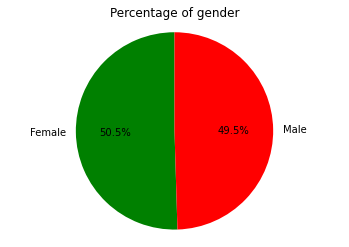

Number of values:
Male      3555
Female    3488
Name: gender, dtype: int64
***************************************************************************************
SeniorCitizen


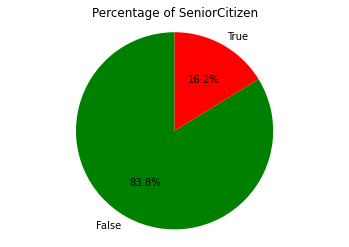

Number of values:
False    5901
True     1142
Name: SeniorCitizen, dtype: int64
***************************************************************************************
Partner


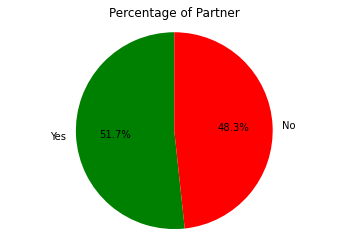

Number of values:
No     3641
Yes    3402
Name: Partner, dtype: int64
***************************************************************************************
Dependents


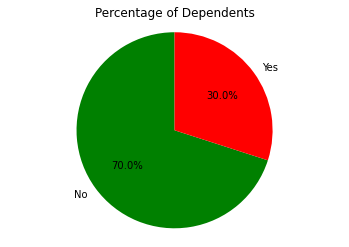

Number of values:
No     4933
Yes    2110
Name: Dependents, dtype: int64
***************************************************************************************
PhoneService


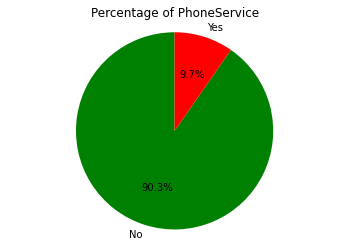

Number of values:
Yes    6361
No      682
Name: PhoneService, dtype: int64
***************************************************************************************
MultipleLines


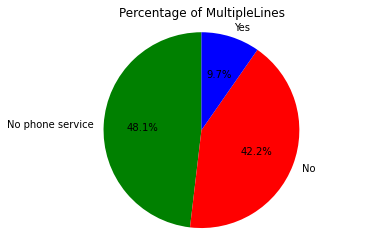

Number of values:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
***************************************************************************************
InternetService


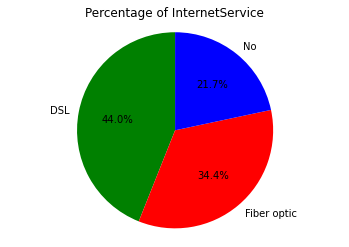

Number of values:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
***************************************************************************************
OnlineSecurity


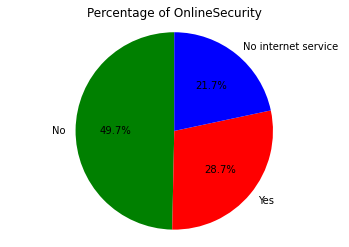

Number of values:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
***************************************************************************************
OnlineBackup


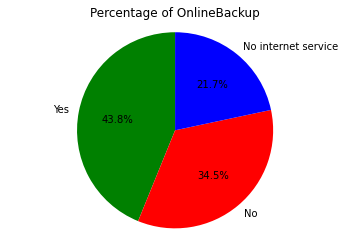

Number of values:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
***************************************************************************************
DeviceProtection


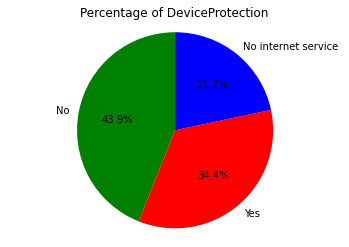

Number of values:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
***************************************************************************************
TechSupport


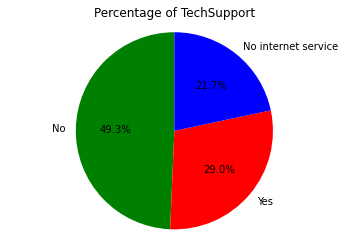

Number of values:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
***************************************************************************************
StreamingTV


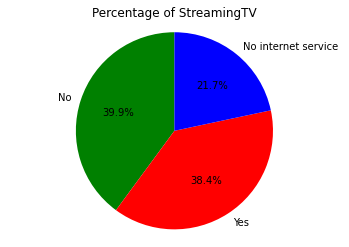

Number of values:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
***************************************************************************************
StreamingMovies


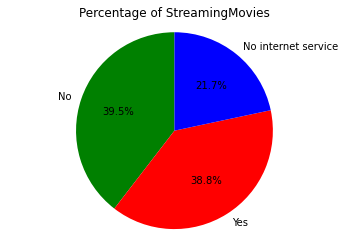

Number of values:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
***************************************************************************************
Contract


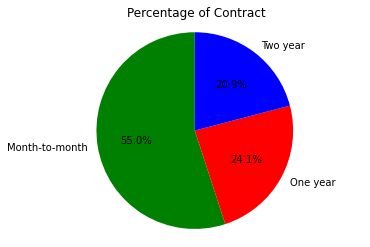

Number of values:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
***************************************************************************************
PaperlessBilling


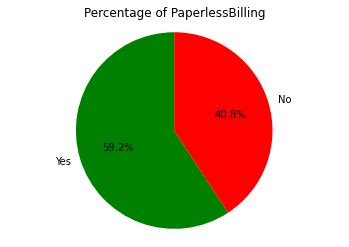

Number of values:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
***************************************************************************************
PaymentMethod


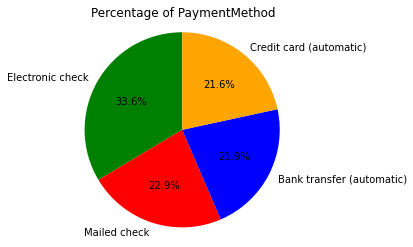

Number of values:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
***************************************************************************************
Churn


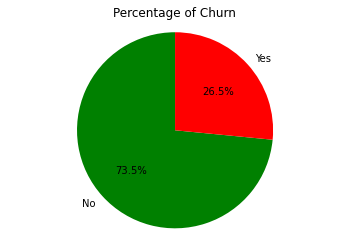

Number of values:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [118]:
for i in df_object.columns:
    print('***************************************************************************************')
    print(i)
    etiquetas = df_object[i].unique()
    sectores = list(df_object[i].value_counts())
    plt.pie(sectores, labels=etiquetas, colors=['green', "red", 'blue', 'orange'],autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.title('Percentage of %s' %i)
    plt.show()
    x = df_object[i].value_counts()
    print('Number of values:')
    print(x)

## Model Preparation

In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [121]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [122]:
df_model=pd.concat([df[numerical_features], df[categorical_features]], axis=1)

In [123]:
df_model = df_model.drop(labels=["customerID"], axis=1)

In [124]:
from sklearn.preprocessing import RobustScaler

features = df_model[numerical_features]
scaler = RobustScaler().fit(features.values)

features = scaler.transform(features.values)

df_model[numerical_features] = features
df_model.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.608696,-0.745170,-0.402798,Female,False,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0.108696,-0.246550,0.146087,Male,False,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-0.586957,-0.303588,-0.379687,Male,False,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0.347826,-0.516099,0.131698,Male,False,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-0.586957,0.006440,-0.366848,Female,False,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [126]:
categorical_features = df_model.select_dtypes(include=['object']).columns

In [127]:
df_model = pd.get_dummies(df_model, columns = categorical_features, drop_first=True)
df_model.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.608696,-0.745170,-0.402798,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.108696,-0.246550,0.146087,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.586957,-0.303588,-0.379687,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.347826,-0.516099,0.131698,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.586957,0.006440,-0.366848,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


<AxesSubplot:>

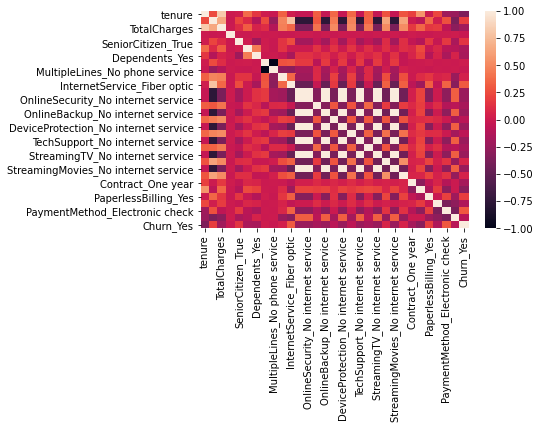

In [128]:
sns.heatmap(df_model.corr())

In [130]:
df_model.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_True', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [131]:
df_model = df_model.drop(labels=['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)

## Runing the Logistic Regression Model

In [133]:
from sklearn.model_selection import train_test_split

X = df_model.drop("Churn_Yes", axis = 1)
variables = X.columns
X = X.values

y = df_model["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25, stratify=y)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

clf = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [135]:
clf.score(X_train, y_train) # Score of our model

0.8084059068534646

In [136]:
clf.coef_ # Coeficients of each feature

array([[-2.27107698,  0.24066782,  0.72817867, -0.10883705,  0.23846091,
        -0.03007306, -0.18946094, -0.73379628, -0.04791262,  0.23310851,
         0.65844047, -0.69740468, -0.48570221, -0.19873268, -0.07545351,
        -0.42730899,  0.11209166,  0.1734521 , -0.70873769, -1.25244542,
         0.37874212, -0.04808038,  0.32882496, -0.04306706]])

Feature: tenure, Score: -2.27108
Feature: MonthlyCharges, Score: 0.24067
Feature: TotalCharges, Score: 0.72818
Feature: gender_Male, Score: -0.10884
Feature: SeniorCitizen_True, Score: 0.23846
Feature: Partner_Yes, Score: -0.03007
Feature: Dependents_Yes, Score: -0.18946
Feature: PhoneService_Yes, Score: -0.73380
Feature: MultipleLines_No phone service, Score: -0.04791
Feature: MultipleLines_Yes, Score: 0.23311
Feature: InternetService_Fiber optic, Score: 0.65844
Feature: InternetService_No, Score: -0.69740
Feature: OnlineSecurity_Yes, Score: -0.48570
Feature: OnlineBackup_Yes, Score: -0.19873
Feature: DeviceProtection_Yes, Score: -0.07545
Feature: TechSupport_Yes, Score: -0.42731
Feature: StreamingTV_Yes, Score: 0.11209
Feature: StreamingMovies_Yes, Score: 0.17345
Feature: Contract_One year, Score: -0.70874
Feature: Contract_Two year, Score: -1.25245
Feature: PaperlessBilling_Yes, Score: 0.37874
Feature: PaymentMethod_Credit card (automatic), Score: -0.04808
Feature: PaymentMethod_Ele

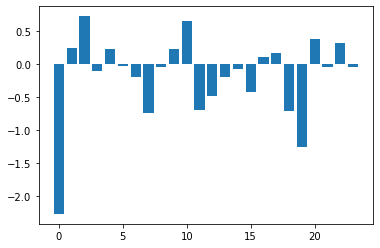

In [140]:
importance = clf.coef_[0]

# summarize feature importance
for i,v in zip(variables,importance):
    print('Feature: %s, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [145]:
clf.predict_proba(X_test) # Predicted Probabilities for our test set

array([[0.5263488 , 0.4736512 ],
       [0.87290662, 0.12709338],
       [0.99657483, 0.00342517],
       ...,
       [0.29441719, 0.70558281],
       [0.55451837, 0.44548163],
       [0.54337957, 0.45662043]])

In [146]:
y_pred  = clf.predict(X_test) # Predicted values
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

### CONFUSION MATRIX

In [147]:
confusion_matrix(y_test, y_pred)

array([[1148,  146],
       [ 221,  246]], dtype=int64)

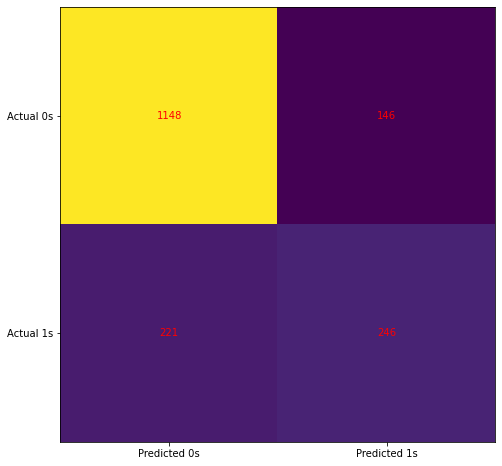

In [148]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Here is where I want to make a clear explanation from the results we got. This matrix shows how well is performing our model in terms of predicting our target variable and how wrongly is performing as well. 

**GOOD PERFORMANCE OF OUR MODEL**
- On the left top corner we have the value called **True Negatives** and this means that our model is predicting that 1148 values are predicted like 0 and they really are 0. On the right bottom corner, we have the **True positives** meaning that 246 were predicted as 1 and they really are 1.

**BAD PERFORMANCE OF OUR MODEL**
- On the right top side of the matrix we have the **False Positives** meaning that 146 values were predicted as 1 but they really are 0. Finally, on the left bottom part, we have the **False Negatives** values, meaning that 221 values were predicted as 0 and they really are 1. 

But these are the results for our calculation model withing within a threshold given to the model. We can see that there are many different thresholds for the same model, where you can modify the accuracy of our model and the results of our confusion matrix in our favor. And this can be done with the threshold value. So let's see the different results we can obtain for our model. 

***IMPORTANT***--> Sometimes the accuracy is not the most important metric of our model, sometimes we need to understand the whole meaning of our target variable in order to decide which solution is the best for us.

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.63      0.53      0.57       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



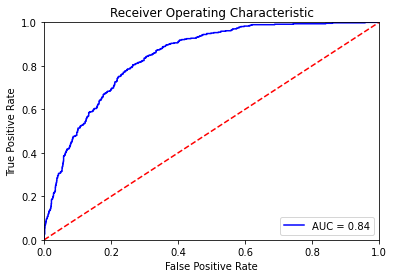

In [150]:
import sklearn.metrics as metrics

probs_y=clf.predict_proba(X_test)
preds = probs_y[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(0.0, 1.0)

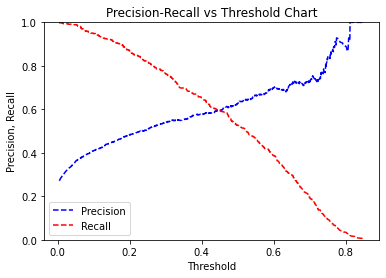

In [151]:
pred_y=clf.predict(X_test) 

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [152]:
pred_proba_df = pd.DataFrame(clf.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.534923339011925
[[480 814]
 [  5 462]]

******** For i = 0.1 ******
Our testing accuracy is 0.6235093696763203
[[655 639]
 [ 24 443]]

******** For i = 0.15 ******
Our testing accuracy is 0.6780238500851788
[[765 529]
 [ 38 429]]

******** For i = 0.2 ******
Our testing accuracy is 0.7183418512208972
[[862 432]
 [ 64 403]]

******** For i = 0.25 ******
Our testing accuracy is 0.7416240772288473
[[925 369]
 [ 86 381]]

******** For i = 0.3 ******
Our testing accuracy is 0.7643384440658717
[[990 304]
 [111 356]]

******** For i = 0.35 ******
Our testing accuracy is 0.7705848949460534
[[1031  263]
 [ 141  326]]

******** For i = 0.4 ******
Our testing accuracy is 0.78137421919364
[[1071  223]
 [ 162  305]]

******** For i = 0.45 ******
Our testing accuracy is 0.7853492333901193
[[1106  188]
 [ 190  277]]

******** For i = 0.5 ******
Our testing accuracy is 0.7915956842703009
[[1148  146]
 [ 221  246]]

******** For i = 0.55 ******
Ou